In [1]:
# Resume Classifier Implementation - Steps 0 & 1
# File: resume_classifier.ipynb

import os
import json
import numpy as np
import pandas as pd
import random
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

# Step 0 - Project Setup
print("=== Step 0: Project Setup ===")

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Create project structure
project_folders = ['data', 'models', 'data/domain_requirements', "src"]
for folder in project_folders:
    Path(folder).mkdir(parents=True, exist_ok=True)
    print(f"Created folder: {folder}")

print("Project structure created successfully!")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pavan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\pavan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\pavan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\pavan\AppData\Roaming\Python\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pavan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\pavan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\pavan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\pavan\AppData\Roaming\Python\

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



=== Step 0: Project Setup ===
Created folder: data
Created folder: models
Created folder: data/domain_requirements
Created folder: src
Project structure created successfully!


In [11]:
import json
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def get_domain_requirements():
    """Define and return domain requirements for different job categories"""
    return {
        "data_science": {
            "domain": "Data Science",
            "required_skills": ["Python", "Pandas", "NumPy", "Scikit-learn", "PyTorch", "Docker", "Deep Learning"]
        },
        "web_development": {
            "domain": "Web Development", 
            "required_skills": ["JavaScript", "React", "Node.js", "HTML", "CSS", "MongoDB", "Express"]
        },
        "mobile_development": {
            "domain": "Mobile Development",
            "required_skills": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "iOS", "Android"]
        },
        "devops": {
            "domain": "DevOps",
            "required_skills": ["Docker", "Kubernetes", "AWS", "Jenkins", "Terraform", "Linux", "CI/CD"]
        },
        "cybersecurity": {
            "domain": "Cybersecurity",
            "required_skills": ["Network Security", "Penetration Testing", "CISSP", "Firewall", "Encryption", "Python", "Risk Assessment"]
        }
    }


def get_skill_pools():
    """Return comprehensive skill pools for each domain"""
    return {
        "data_science": ["Python", "R", "SQL", "Pandas", "NumPy", "Scikit-learn", "TensorFlow", "PyTorch", 
                        "Matplotlib", "Seaborn", "Jupyter", "Docker", "Deep Learning", "Machine Learning", 
                        "Statistics", "Data Visualization", "Big Data", "Spark", "Hadoop"],
        "web_dev": ["JavaScript", "React", "Vue.js", "Angular", "Node.js", "Express", "HTML", "CSS", 
                   "MongoDB", "PostgreSQL", "MySQL", "Redis", "GraphQL", "REST API", "TypeScript", 
                   "Webpack", "Git", "Bootstrap", "Sass"],
        "mobile": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "Dart", "iOS", "Android", 
                  "Xcode", "Android Studio", "Firebase", "SQLite", "Core Data", "UIKit", "SwiftUI"],
        "devops": ["Docker", "Kubernetes", "AWS", "Azure", "GCP", "Jenkins", "Terraform", "Ansible", 
                  "Linux", "Bash", "Python", "CI/CD", "Git", "Monitoring", "Nagios", "Prometheus"],
        "security": ["Network Security", "Penetration Testing", "CISSP", "CEH", "Firewall", "Encryption", 
                    "Python", "Wireshark", "Metasploit", "Nmap", "Risk Assessment", "Compliance", "SIEM"]
    }


def get_project_templates():
    """Return project templates for each domain"""
    return {
        "data_science": ["Customer Churn Prediction", "Sales Forecasting Model", "Recommendation System", 
                        "Fraud Detection Algorithm", "Image Classification", "Natural Language Processing"],
        "web_dev": ["E-commerce Website", "Social Media Platform", "Portfolio Website", "Blog Platform", 
                   "Task Management App", "Real-time Chat Application"],
        "mobile": ["Weather App", "Fitness Tracker", "Food Delivery App", "Social Media App", 
                  "Game Application", "Banking App"],
        "devops": ["CI/CD Pipeline Setup", "Infrastructure as Code", "Container Orchestration", 
                  "Monitoring Dashboard", "Automated Deployment", "Cloud Migration"],
        "security": ["Vulnerability Assessment", "Security Audit", "Network Monitoring System", 
                    "Incident Response Plan", "Security Training Program", "Compliance Framework"]
    }


def get_job_titles():
    """Return job titles for each domain"""
    return {
        "data_science": ["Data Scientist", "ML Engineer", "Data Analyst", "Research Scientist"],
        "web_dev": ["Frontend Developer", "Backend Developer", "Full Stack Developer", "Web Developer"],
        "mobile": ["iOS Developer", "Android Developer", "Mobile Developer", "App Developer"],
        "devops": ["DevOps Engineer", "Site Reliability Engineer", "Cloud Engineer", "Infrastructure Engineer"],
        "security": ["Security Analyst", "Cybersecurity Engineer", "Security Consultant", "SOC Analyst"]
    }


def get_skill_key_mapping():
    """Return mapping between domain names and skill pool keys"""
    return {
        "data_science": "data_science",
        "web_development": "web_dev", 
        "mobile_development": "mobile",
        "devops": "devops",
        "cybersecurity": "security"
    }


def save_domain_requirements(domain_requirements, filepath='data/domain_requirements.json'):
    """Save domain requirements to JSON file"""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, 'w') as f:
        json.dump(domain_requirements, f, indent=2)
    print(f"Saved → {filepath}")


def generate_fit_resume_skills(required_skills, domain_skills):
    """Generate skills for a 'fit' candidate"""
    required_count = max(1, int(len(required_skills) * random.uniform(0.7, 1.0)))
    selected_required = random.sample(required_skills, required_count)
    additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(2, 5))
    selected_skills = selected_required + additional_domain
    test_score = int(random.uniform(75, 100))
    n_projects = random.randint(1, 4)
    
    return selected_skills, test_score, n_projects


def generate_partial_fit_resume_skills(required_skills, domain_skills):
    """Generate skills for a 'partial_fit' candidate"""
    if random.choice([True, False]):
        required_count = max(1, int(len(required_skills) * random.uniform(0.4, 0.69)))
        selected_required = random.sample(required_skills, required_count)
        additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 3))
        selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(30, 100))
    else:
        required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
        selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
        additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
        selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(50, 74))
    
    n_projects = random.randint(0, 3)
    return selected_skills, test_score, n_projects


def generate_not_fit_resume_skills(required_skills, domain_skills, other_skills):
    """Generate skills for a 'not_fit' candidate"""
    if random.choice([True, False]):
        required_count = max(0, int(len(required_skills) * random.uniform(0.0, 0.39)))
        selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
        
        if random.choice([True, False]):
            selected_skills = selected_required + random.sample(other_skills, random.randint(2, 6))
        else:
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(0, 2))
            selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(0, 100))
    else:
        required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
        selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
        additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
        selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(0, 49))
    
    n_projects = random.randint(0, 2)
    return selected_skills, test_score, n_projects


def generate_work_experience(job_titles_list, n_jobs):
    """Generate work experience entries"""
    return [{"title": random.choice(job_titles_list), "years": random.randint(1, 8)} for _ in range(n_jobs)]


def generate_resume_for_category(category, candidate_id, domains, domain_requirements, all_skills, 
                                 project_templates, job_titles, skill_key_mapping):
    """Generate a resume targeting a specific fit category"""
    
    preferred_domain_key = random.choice(domains)
    preferred_domain = domain_requirements[preferred_domain_key]["domain"]
    required_skills = domain_requirements[preferred_domain_key]["required_skills"]
    
    domain_skills = all_skills[skill_key_mapping[preferred_domain_key]]
    other_skills = list(set(sum(all_skills.values(), [])) - set(domain_skills))
    
    # Generate skills based on category
    if category == 'fit':
        selected_skills, test_score, n_projects = generate_fit_resume_skills(required_skills, domain_skills)
    elif category == 'partial_fit':
        selected_skills, test_score, n_projects = generate_partial_fit_resume_skills(required_skills, domain_skills)
    else:  # not_fit
        selected_skills, test_score, n_projects = generate_not_fit_resume_skills(required_skills, domain_skills, other_skills)
    
    # Add random other skills
    if len(selected_skills) < 8:
        selected_skills.extend(random.sample(other_skills, random.randint(0, 3)))
    
    # Generate projects
    domain_projects = project_templates[skill_key_mapping[preferred_domain_key]]
    selected_projects = random.sample(domain_projects, min(n_projects, len(domain_projects)))
    
    # Generate work experience
    n_jobs = random.randint(1, 4)
    domain_job_titles = job_titles[skill_key_mapping[preferred_domain_key]]
    work_experience = generate_work_experience(domain_job_titles, n_jobs)
    
    return {
        "skills": list(set(selected_skills)),
        "projects": selected_projects,
        "work_experience": work_experience,
        "test_score": test_score,
        "preferred_domain": preferred_domain,
        "id": f"candidate_{candidate_id:04d}"
    }


def generate_balanced_resumes(n_samples=2000, target_distribution=None, domain_requirements=None,
                              all_skills=None, project_templates=None, job_titles=None, skill_key_mapping=None):
    """Generate synthetic resume data with balanced labels"""
    
    if target_distribution is None:
        target_distribution = {'fit': 0.33, 'partial_fit': 0.34, 'not_fit': 0.33}
    
    if domain_requirements is None:
        domain_requirements = get_domain_requirements()
    if all_skills is None:
        all_skills = get_skill_pools()
    if project_templates is None:
        project_templates = get_project_templates()
    if job_titles is None:
        job_titles = get_job_titles()
    if skill_key_mapping is None:
        skill_key_mapping = get_skill_key_mapping()
    
    n_fit = int(n_samples * target_distribution['fit'])
    n_partial = int(n_samples * target_distribution['partial_fit'])
    n_not_fit = n_samples - n_fit - n_partial
    
    domains = list(domain_requirements.keys())
    resumes = []
    candidate_id = 1
    
    for _ in range(n_fit):
        resumes.append(generate_resume_for_category('fit', candidate_id, domains, domain_requirements, 
                                                    all_skills, project_templates, job_titles, skill_key_mapping))
        candidate_id += 1
    
    for _ in range(n_partial):
        resumes.append(generate_resume_for_category('partial_fit', candidate_id, domains, domain_requirements,
                                                    all_skills, project_templates, job_titles, skill_key_mapping))
        candidate_id += 1
    
    for _ in range(n_not_fit):
        resumes.append(generate_resume_for_category('not_fit', candidate_id, domains, domain_requirements,
                                                    all_skills, project_templates, job_titles, skill_key_mapping))
        candidate_id += 1
    
    random.shuffle(resumes)
    return resumes


def save_resumes_to_json(resumes, filepath='data/synthetic_resumes.json'):
    """Save generated resumes to JSON file"""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, 'w') as f:
        json.dump(resumes, f, indent=2)
    print(f"Saved → {filepath}")


def main():
    """Main function to execute the balanced dataset generation"""
    print("=== Step 1: Balanced Dataset Generation ===\n")
    
    # Get domain requirements and save
    domain_requirements = get_domain_requirements()
    save_domain_requirements(domain_requirements)
    
    # Generate and save balanced resumes
    synthetic_resumes = generate_balanced_resumes(n_samples=2000)
    save_resumes_to_json(synthetic_resumes)
    
    print(f"\nGenerated {len(synthetic_resumes)} synthetic resumes")


if __name__ == "__main__":
    main()

=== Step 1: Balanced Dataset Generation ===

Saved → data/domain_requirements.json
Saved → data/synthetic_resumes.json

Generated 2000 synthetic resumes


Generated 2000 resumes → data/labeled_synthetic_resumes.json

Dataset Statistics:
Total: 2000 | Avg Test Score: 62.3

Label Distribution:
label
Partial Fit    812
Fit            673
Not Fit        515
Name: count, dtype: int64


=== Analysis by Domain ===
label               Fit  Not Fit  Partial Fit
preferred_domain                             
Cybersecurity       136      104          149
Data Science        143      114          167
DevOps              143       86          158
Mobile Development  131       98          170
Web Development     120      113          168


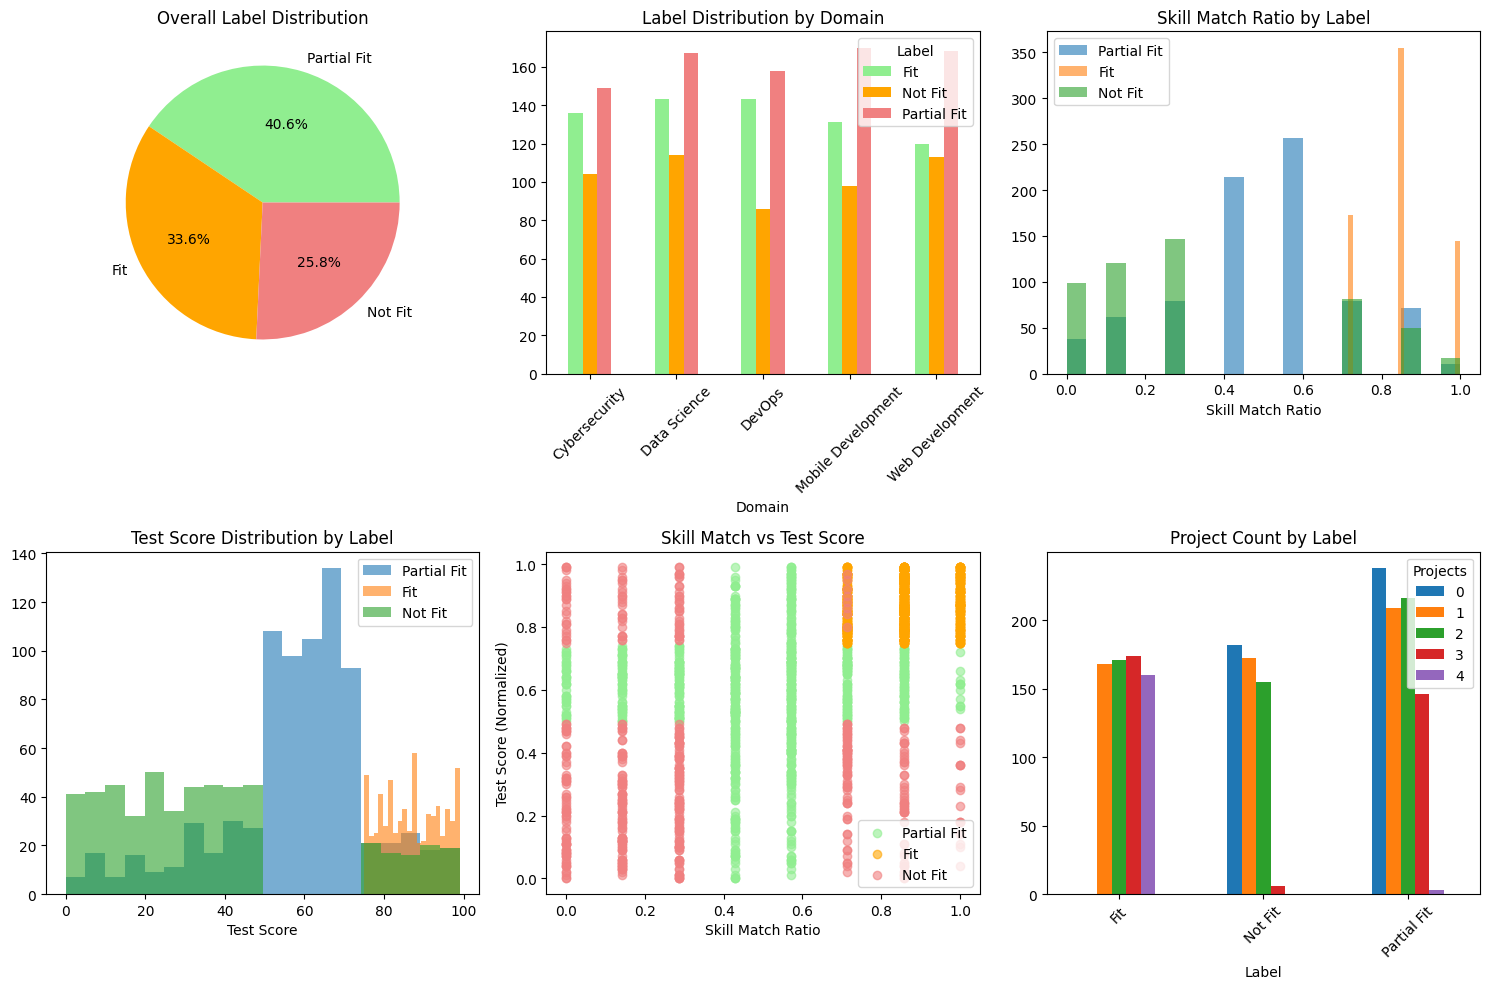

Analysis saved → data/labeling_analysis.png


In [12]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_domain_requirements(filepath='data/domain_requirements.json'):
    """Load domain requirements from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


def load_resumes(filepath='data/synthetic_resumes.json'):
    """Load resumes from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


def calculate_resume_metrics(resume, required_skills):
    """Calculate metrics for a single resume"""
    candidate_skills = set(resume["skills"])
    skill_match_ratio = len(required_skills.intersection(candidate_skills)) / len(required_skills)
    test_score_norm = resume["test_score"] / 100.0
    project_count = len(resume["projects"])
    
    return skill_match_ratio, test_score_norm, project_count


def determine_label(skill_match_ratio, test_score_norm, project_count):
    """Determine label based on metrics using defined rules"""
    if skill_match_ratio >= 0.70 and test_score_norm >= 0.75 and project_count >= 1:
        return "Fit"
    elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
        return "Partial Fit"
    else:
        return "Not Fit"


def calculate_labels(resumes, domain_requirements):
    """Calculate labels for resumes based on rules"""
    labeled_resumes = []
    
    for resume in resumes:
        # Find the domain key for this resume
        preferred_domain_key = next(
            (k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), 
            None
        )
        if not preferred_domain_key:
            continue
            
        required_skills = set(domain_requirements[preferred_domain_key]["required_skills"])
        
        # Calculate metrics
        skill_match_ratio, test_score_norm, project_count = calculate_resume_metrics(resume, required_skills)
        
        # Determine label
        label = determine_label(skill_match_ratio, test_score_norm, project_count)
        
        # Create labeled resume
        resume_with_label = resume.copy()
        resume_with_label.update({
            "skill_match_ratio": skill_match_ratio,
            "test_score_norm": test_score_norm,
            "project_count": project_count,
            "label": label
        })
        labeled_resumes.append(resume_with_label)
    
    return labeled_resumes


def save_labeled_resumes(labeled_resumes, filepath='data/labeled_synthetic_resumes.json'):
    """Save labeled resumes to JSON file"""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, 'w') as f:
        json.dump(labeled_resumes, f, indent=2)
    print(f"Generated {len(labeled_resumes)} resumes → {filepath}\n")


def print_dataset_statistics(df):
    """Print basic dataset statistics"""
    label_counts = df['label'].value_counts()
    
    print("Dataset Statistics:")
    print(f"Total: {len(df)} | Avg Test Score: {df['test_score'].mean():.1f}")
    print(f"\nLabel Distribution:\n{label_counts}\n")
    
    return label_counts


def print_domain_analysis(df):
    """Print detailed analysis by domain"""
    print("\n=== Analysis by Domain ===")
    domain_label_crosstab = pd.crosstab(df['preferred_domain'], df['label'])
    print(domain_label_crosstab)
    return domain_label_crosstab


def plot_overall_distribution(ax, label_counts, colors):
    """Plot overall label distribution pie chart"""
    ax.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title('Overall Label Distribution')


def plot_domain_distribution(ax, domain_label_crosstab, colors):
    """Plot label distribution by domain"""
    domain_label_crosstab.plot(kind='bar', ax=ax, color=colors)
    ax.set_title('Label Distribution by Domain')
    ax.set_xlabel('Domain')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Label')


def plot_skill_match_histogram(ax, df):
    """Plot skill match ratio histogram by label"""
    for label in df['label'].unique():
        data = df[df['label'] == label]['skill_match_ratio']
        ax.hist(data, alpha=0.6, label=label, bins=20)
    ax.set_xlabel('Skill Match Ratio')
    ax.set_title('Skill Match Ratio by Label')
    ax.legend()


def plot_test_score_histogram(ax, df):
    """Plot test score distribution by label"""
    for label in df['label'].unique():
        data = df[df['label'] == label]['test_score']
        ax.hist(data, alpha=0.6, label=label, bins=20)
    ax.set_xlabel('Test Score')
    ax.set_title('Test Score Distribution by Label')
    ax.legend()


def plot_skill_vs_test_scatter(ax, df, colors):
    """Plot scatter plot of skill match vs test score"""
    for i, label in enumerate(df['label'].unique()):
        data = df[df['label'] == label]
        ax.scatter(data['skill_match_ratio'], data['test_score_norm'], 
                  alpha=0.6, label=label, color=colors[i])
    ax.set_xlabel('Skill Match Ratio')
    ax.set_ylabel('Test Score (Normalized)')
    ax.set_title('Skill Match vs Test Score')
    ax.legend()


def plot_project_count_distribution(ax, df):
    """Plot project count by label"""
    project_counts_by_label = df.groupby(['label', 'project_count']).size().unstack(fill_value=0)
    project_counts_by_label.plot(kind='bar', ax=ax)
    ax.set_title('Project Count by Label')
    ax.set_xlabel('Label')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Projects')


def create_visualization(df, label_counts, domain_label_crosstab, save_path='data/labeling_analysis.png'):
    """Create comprehensive visualization with all plots"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    colors = ['lightgreen', 'orange', 'lightcoral']
    
    # Create all plots
    plot_overall_distribution(axes[0, 0], label_counts, colors)
    plot_domain_distribution(axes[0, 1], domain_label_crosstab, colors)
    plot_skill_match_histogram(axes[0, 2], df)
    plot_test_score_histogram(axes[1, 0], df)
    plot_skill_vs_test_scatter(axes[1, 1], df, colors)
    plot_project_count_distribution(axes[1, 2], df)
    
    # Save and display
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Analysis saved → {save_path}")


def analyze_labeled_resumes(labeled_resumes):
    """Perform complete analysis on labeled resumes"""
    # Convert to DataFrame
    df = pd.DataFrame(labeled_resumes)
    
    # Print statistics
    label_counts = print_dataset_statistics(df)
    domain_label_crosstab = print_domain_analysis(df)
    
    # Create visualizations
    create_visualization(df, label_counts, domain_label_crosstab)
    
    return df


def main():
    """Main function to execute resume labeling and analysis"""
    # Load data
    domain_requirements = load_domain_requirements()
    synthetic_resumes = load_resumes()
    
    # Calculate labels
    labeled_resumes = calculate_labels(synthetic_resumes, domain_requirements)
    
    # Save labeled resumes
    save_labeled_resumes(labeled_resumes)
    
    # Analyze and visualize
    analyze_labeled_resumes(labeled_resumes)


if __name__ == "__main__":
    main()

In [13]:
import json
import numpy as np
from sklearn.preprocessing import StandardScaler


# ============================================================================
# Skill Vocabulary Functions
# ============================================================================

def build_skill_vocabulary(resumes, domain_requirements):
    """Build comprehensive skill vocabulary from resumes and domain requirements"""
    all_skills = set()
    
    # Collect skills from resumes
    for resume in resumes:
        all_skills.update(resume.get('skills', []))
    
    # Collect skills from domain requirements
    for domain_data in domain_requirements.values():
        all_skills.update(domain_data.get('required_skills', []))
    
    # Clean and normalize skills
    cleaned_skills = {
        skill.strip().lower() 
        for skill in all_skills 
        if skill.strip() and len(skill.strip()) > 1
    }
    
    return sorted(list(cleaned_skills))


def encode_skills(candidate_skills, skill_vocab):
    """Convert skills to binary vector representation"""
    skill_vector = np.zeros(len(skill_vocab), dtype=int)
    normalized_skills = {skill.strip().lower() for skill in candidate_skills}
    
    for i, vocab_skill in enumerate(skill_vocab):
        if vocab_skill in normalized_skills:
            skill_vector[i] = 1
    
    return skill_vector


# ============================================================================
# Skill Matching Functions
# ============================================================================

def compute_skill_matches(candidate_skills, required_skills):
    """Compute matched and missing skills with match ratio"""
    candidate_set = {skill.strip().lower() for skill in candidate_skills}
    required_set = {skill.strip().lower() for skill in required_skills}
    
    matched_skills = list(candidate_set.intersection(required_set))
    missing_skills = list(required_set - candidate_set)
    skill_match_ratio = len(matched_skills) / len(required_set) if required_set else 0.0
    
    return matched_skills, missing_skills, skill_match_ratio


def suggest_alternative_domains(candidate_skills, current_domain, domain_requirements, top_n=3):
    """Suggest alternative domains based on skill match"""
    suggestions = []
    
    for domain_key, domain_info in domain_requirements.items():
        domain_name = domain_info["domain"]
        
        # Skip current domain
        if domain_name == current_domain:
            continue
        
        required_skills = domain_info["required_skills"]
        matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
        suggestions.append({
            'domain': domain_name,
            'domain_key': domain_key,
            'skill_match_ratio': ratio,
            'matched_skills': matched,
            'missing_skills': missing,
            'matched_count': len(matched),
            'required_count': len(required_skills)
        })
    
    # Sort by match ratio in descending order
    suggestions.sort(key=lambda x: x['skill_match_ratio'], reverse=True)
    return suggestions[:top_n]


# ============================================================================
# Feature Extraction Functions
# ============================================================================

def extract_project_features(projects):
    """Extract features from project list"""
    project_count = len(projects) if projects else 0
    project_text = " ".join(projects) if projects else ""
    return project_count, project_text


def extract_experience_features(work_experience):
    """Extract features from work experience"""
    if not work_experience:
        return 0.0, 0, ""
    
    years_experience = sum(item.get('years', 0) for item in work_experience)
    max_years = max(item.get('years', 0) for item in work_experience)
    job_titles = [item.get('title', '') for item in work_experience]
    experience_text = " ".join(job_titles)
    
    return float(years_experience), max_years, experience_text


def normalize_test_score(test_score):
    """Normalize test score to 0-1 range"""
    return max(0, min(100, float(test_score))) / 100.0


def extract_all_features(resume, skill_vocab, domain_requirements):
    """Extract all features from a single resume"""
    # Find domain key
    domain_key = next(
        (k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), 
        None
    )
    if domain_key is None:
        raise ValueError(f"No requirements found for domain {resume['preferred_domain']}")
    
    # Extract basic data
    required_skills = domain_requirements[domain_key]["required_skills"]
    candidate_skills = resume.get('skills', [])
    projects = resume.get('projects', [])
    work_experience = resume.get('work_experience', [])
    test_score = resume.get('test_score', 0)
    
    # Compute features
    skill_vector = encode_skills(candidate_skills, skill_vocab)
    matched_skills, missing_skills, skill_match_ratio = compute_skill_matches(
        candidate_skills, required_skills
    )
    project_count, project_text = extract_project_features(projects)
    years_experience, max_years, experience_text = extract_experience_features(work_experience)
    test_score_norm = normalize_test_score(test_score)
    numeric_features = [years_experience, max_years, project_count]
    alternative_domains = suggest_alternative_domains(
        candidate_skills, resume['preferred_domain'], domain_requirements, top_n=3
    )
    
    return {
        'skill_vector': skill_vector,
        'skill_match_ratio': skill_match_ratio,
        'matched_skills': matched_skills,
        'missing_skills': missing_skills,
        'project_count': project_count,
        'project_text': project_text,
        'years_experience': years_experience,
        'max_years': max_years,
        'experience_text': experience_text,
        'test_score': test_score,
        'test_score_norm': test_score_norm,
        'numeric_features': numeric_features,
        'domain': resume['preferred_domain'],
        'id': resume['id'],
        'alternative_domains': alternative_domains
    }


# ============================================================================
# Feature Scaling
# ============================================================================

class ResumeFeatureScaler:
    """Scaler for numeric resume features"""
    
    def __init__(self):
        self.project_scaler = StandardScaler()
        self.experience_scaler = StandardScaler()
        self.is_fitted = False
    
    def fit(self, numeric_features):
        """Fit the scaler on numeric features"""
        if len(numeric_features) == 0:
            return self
        
        numeric_array = np.array(numeric_features)
        if numeric_array.shape[1] >= 3:
            self.experience_scaler.fit(numeric_array[:, :2])
            self.project_scaler.fit(numeric_array[:, 2:3])
        
        self.is_fitted = True
        return self
    
    def transform(self, numeric_features):
        """Transform numeric features using fitted scaler"""
        if not self.is_fitted:
            raise ValueError("Scaler must be fitted before transform")
        
        numeric_array = np.array(numeric_features)
        if numeric_array.ndim == 1:
            numeric_array = numeric_array.reshape(1, -1)
        
        if numeric_array.shape[1] >= 3:
            scaled_experience = self.experience_scaler.transform(numeric_array[:, :2])
            scaled_projects = self.project_scaler.transform(numeric_array[:, 2:3])
            return np.concatenate([scaled_experience, scaled_projects], axis=1)
        
        return np.array([])
    
    def fit_transform(self, numeric_features):
        """Fit and transform in one step"""
        return self.fit(numeric_features).transform(numeric_features)


# ============================================================================
# Batch Processing Functions
# ============================================================================

def extract_features_from_resumes(labeled_resumes, skill_vocab, domain_requirements):
    """Extract features from all resumes"""
    all_features = []
    
    for resume in labeled_resumes:
        try:
            features = extract_all_features(resume, skill_vocab, domain_requirements)
            features['label'] = resume['label']
            all_features.append(features)
        except Exception as e:
            print(f"Error processing resume {resume.get('id', 'unknown')}: {e}")
            continue
    
    return all_features


def scale_numeric_features(all_features):
    """Scale numeric features for all extracted features"""
    # Extract numeric feature matrix
    numeric_feature_matrix = [f['numeric_features'] for f in all_features]
    
    # Fit scaler
    scaler = ResumeFeatureScaler()
    scaler.fit(numeric_feature_matrix)
    
    # Transform and add scaled features
    for features in all_features:
        scaled_numeric = scaler.transform([features['numeric_features']])
        features['scaled_numeric_features'] = scaled_numeric[0]
    
    return scaler


# ============================================================================
# Save/Load Functions
# ============================================================================

def save_skill_vocabulary(skill_vocab, filepath='data/skill_vocab.json'):
    """Save skill vocabulary to JSON file"""
    with open(filepath, 'w') as f:
        json.dump(skill_vocab, f, indent=2)
    print(f"Saved skill vocabulary → {filepath}")


def prepare_sample_features_for_json(features_list, n_samples=5):
    """Prepare sample features for JSON serialization"""
    sample_features = features_list[:n_samples]
    
    # Convert numpy arrays to lists for JSON serialization
    for features in sample_features:
        features['skill_vector'] = features['skill_vector'].tolist()
        features['scaled_numeric_features'] = features['scaled_numeric_features'].tolist()
    
    return sample_features


def save_sample_features(all_features, filepath='data/sample_features.json', n_samples=5):
    """Save sample features to JSON file"""
    sample_features = prepare_sample_features_for_json(all_features, n_samples)
    
    with open(filepath, 'w') as f:
        json.dump(sample_features, f, indent=2)
    print(f"Saved sample features → {filepath}")


def print_feature_summary(all_features):
    """Print summary of extracted features"""
    if not all_features:
        print("No features to summarize")
        return
    
    sample = all_features[0]
    
    print(f"\nFeature Summary (sample):")
    print(f"  Skill match ratio: {sample['skill_match_ratio']:.3f}")
    print(f"  Projects: {sample['project_count']} | Experience: {sample['years_experience']:.0f} yrs")
    
    if sample['alternative_domains']:
        top_alt = sample['alternative_domains'][0]
        print(f"  Top alternative: {top_alt['domain']} ({top_alt['skill_match_ratio']:.3f} match)")


# ============================================================================
# Main Pipeline Function
# ============================================================================

def main(labeled_resumes, domain_requirements):
    """Main function to execute feature engineering pipeline"""
    print("\n=== Step 3: Feature Engineering ===")
    
    # Build vocabulary
    skill_vocab = build_skill_vocabulary(labeled_resumes, domain_requirements)
    print(f"Skill vocabulary: {len(skill_vocab)} unique skills")
    
    # Extract features
    all_features = extract_features_from_resumes(labeled_resumes, skill_vocab, domain_requirements)
    print(f"Extracted features from {len(all_features)} resumes")
    
    # Scale numeric features
    scaler = scale_numeric_features(all_features)
    
    # Save artifacts
    save_skill_vocabulary(skill_vocab)
    save_sample_features(all_features)
    
    # Print summary
    print_feature_summary(all_features)
    
    return all_features, skill_vocab, scaler


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    # Load data (assuming these are already loaded)
    with open('data/labeled_synthetic_resumes.json', 'r') as f:
        labeled_resumes = json.load(f)
    
    with open('data/domain_requirements.json', 'r') as f:
        domain_requirements = json.load(f)
    
    # Run feature engineering
    all_features, skill_vocab, scaler = main(labeled_resumes, domain_requirements)


=== Step 3: Feature Engineering ===
Skill vocabulary: 77 unique skills
Extracted features from 2000 resumes
Saved skill vocabulary → data/skill_vocab.json
Saved sample features → data/sample_features.json

Feature Summary (sample):
  Skill match ratio: 0.143
  Projects: 2 | Experience: 9 yrs
  Top alternative: DevOps (0.143 match)


In [16]:
import json
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer


# ============================================================================
# Feature Vector Builder Class
# ============================================================================

class FeatureVectorBuilder:
    """Builds final feature vectors using parallel branches"""
    
    def __init__(self, skill_vocab_size, use_text_embeddings=False):
        self.skill_vocab_size = skill_vocab_size
        self.use_text_embeddings = use_text_embeddings
        self.project_vectorizer = TfidfVectorizer(
            max_features=64, 
            stop_words='english', 
            ngram_range=(1, 2), 
            min_df=2
        )
        self.experience_vectorizer = TfidfVectorizer(
            max_features=64, 
            stop_words='english', 
            ngram_range=(1, 2), 
            min_df=2
        )
        self.is_fitted = False
    
    def fit_text_vectorizers(self, all_features):
        """Fit TF-IDF vectorizers on text data"""
        project_texts = [f.get('project_text', '') or 'no projects' for f in all_features]
        experience_texts = [f.get('experience_text', '') or 'no experience' for f in all_features]
        
        self.project_vectorizer.fit(project_texts)
        self.experience_vectorizer.fit(experience_texts)
        self.is_fitted = True
    
    def build_skill_branch(self, features):
        """Branch 1: Skills (binary vector + match ratio)"""
        return np.concatenate([features['skill_vector'], [features['skill_match_ratio']]])
    
    def build_numeric_branch(self, features):
        """Branch 2: Numeric features"""
        scaled = features['scaled_numeric_features']
        return np.array([
            features['test_score_norm'],
            scaled[2],  # project_count_scaled
            scaled[0],  # years_experience_scaled
            features['skill_match_ratio']
        ])
    
    def build_text_branch(self, features):
        """Branch 3: Text embeddings (optional)"""
        if not self.use_text_embeddings or not self.is_fitted:
            return np.array([])
        
        project_text = features.get('project_text', '') or 'no projects'
        experience_text = features.get('experience_text', '') or 'no experience'
        
        project_vector = self.project_vectorizer.transform([project_text]).toarray().flatten()
        experience_vector = self.experience_vectorizer.transform([experience_text]).toarray().flatten()
        
        return np.concatenate([project_vector, experience_vector])
    
    def build_final_vector(self, features):
        """Concatenate all branches into final feature vector"""
        branches = [self.build_skill_branch(features), self.build_numeric_branch(features)]
        
        if self.use_text_embeddings and self.is_fitted:
            text_branch = self.build_text_branch(features)
            if len(text_branch) > 0:
                branches.append(text_branch)
        
        return np.concatenate(branches)
    
    def get_feature_dimensions(self):
        """Get dimensions of each feature branch"""
        skill_dim = self.skill_vocab_size + 1
        numeric_dim = 4
        text_dim = 128 if self.use_text_embeddings else 0
        
        return {
            'skill_branch_dim': skill_dim,
            'numeric_branch_dim': numeric_dim,
            'text_branch_dim': text_dim,
            'final_vector_dim': skill_dim + numeric_dim + text_dim
        }


# ============================================================================
# Feature Vector Construction Functions
# ============================================================================

def build_feature_vectors(all_features, vector_builder):
    """Build feature vectors and labels from extracted features"""
    feature_vectors = []
    labels = []
    
    for features in all_features:
        try:
            feature_vectors.append(vector_builder.build_final_vector(features))
            labels.append(features['label'])
        except Exception as e:
            print(f"Error building vector for {features.get('id', 'unknown')}: {e}")
            continue
    
    X = np.array(feature_vectors)
    y = np.array(labels)
    
    return X, y


def calculate_sparsity(X):
    """Calculate sparsity of feature matrix"""
    return np.mean(X == 0)


def get_label_distribution(y):
    """Get unique labels and their counts"""
    unique_labels, label_counts = np.unique(y, return_counts=True)
    return unique_labels, label_counts


def print_feature_vector_summary(X, y, dimensions):
    """Print summary of feature vectors"""
    print(f"Feature vectors built: {X.shape}")
    print(f"  Skill: {dimensions['skill_branch_dim']} | "
          f"Numeric: {dimensions['numeric_branch_dim']} | "
          f"Text: {dimensions['text_branch_dim']}")
    print(f"  Sparsity: {calculate_sparsity(X):.2%}")
    
    unique_labels, label_counts = get_label_distribution(y)
    print(f"\nLabel distribution: {dict(zip(unique_labels, label_counts))}")


# ============================================================================
# Label Mapping Functions
# ============================================================================

def create_label_mapping(unique_labels):
    """Create bidirectional label mapping"""
    label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
    idx_to_label = {idx: label for idx, label in enumerate(unique_labels)}
    
    return {
        'label_to_idx': label_to_idx,
        'idx_to_label': idx_to_label,
        'unique_labels': unique_labels.tolist()
    }


# ============================================================================
# Save/Load Functions
# ============================================================================

def save_feature_matrix(X, filepath='data/X_features.npy'):
    """Save feature matrix to numpy file"""
    np.save(filepath, X)
    print(f"Saved feature matrix → {filepath}")


def save_labels(y, filepath='data/y_labels.npy'):
    """Save labels to numpy file"""
    np.save(filepath, y)
    print(f"Saved labels → {filepath}")


def save_vector_builder(vector_builder, filepath='data/feature_vector_builder.pkl'):
    """Save vector builder using pickle"""
    with open(filepath, 'wb') as f:
        pickle.dump(vector_builder, f)
    print(f"Saved vector builder → {filepath}")


def save_label_mapping(unique_labels, filepath='data/label_mapping.json'):
    """Save label mapping to JSON file"""
    label_mapping = create_label_mapping(unique_labels)
    
    with open(filepath, 'w') as f:
        json.dump(label_mapping, f, indent=2)
    print(f"Saved label mapping → {filepath}")


def save_feature_dimensions(dimensions, filepath='data/feature_dimensions.json'):
    """Save feature dimensions to JSON file"""
    with open(filepath, 'w') as f:
        json.dump(dimensions, f, indent=2)
    print(f"Saved feature dimensions → {filepath}")


def load_vector_builder(filepath='data/feature_vector_builder.pkl'):
    """Load vector builder from pickle file"""
    with open(filepath, 'rb') as f:
        return pickle.load(f)


def load_feature_matrix(filepath='data/X_features.npy'):
    """Load feature matrix from numpy file"""
    return np.load(filepath)


def load_labels(filepath='data/y_labels.npy'):
    """Load labels from numpy file"""
    return np.load(filepath)


def load_label_mapping(filepath='data/label_mapping.json'):
    """Load label mapping from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


# ============================================================================
# Save All Artifacts
# ============================================================================

def save_all_artifacts(X, y, vector_builder, dimensions):
    """Save all feature construction artifacts"""
    # Save feature matrix and labels
    save_feature_matrix(X)
    save_labels(y)
    
    # Save vector builder
    save_vector_builder(vector_builder)
    
    # Save label mapping
    unique_labels, _ = get_label_distribution(y)
    save_label_mapping(unique_labels)
    
    # Save dimensions
    save_feature_dimensions(dimensions)
    
    print("\nAll artifacts saved successfully!")


# ============================================================================
# Main Pipeline Function
# ============================================================================

def main(all_features, skill_vocab, use_text_features=True):
    """Main function to execute feature vector construction pipeline"""
    print("\n=== Step 4: Feature Vector Construction ===")
    
    # Initialize vector builder
    vector_builder = FeatureVectorBuilder(
        skill_vocab_size=len(skill_vocab), 
        use_text_embeddings=use_text_features
    )
    
    # Fit text vectorizers if using text features
    if use_text_features:
        vector_builder.fit_text_vectorizers(all_features)
    
    # Build feature vectors
    X, y = build_feature_vectors(all_features, vector_builder)
    
    # Get dimensions
    dimensions = vector_builder.get_feature_dimensions()
    
    # Print summary
    print_feature_vector_summary(X, y, dimensions)
    
    # Save all artifacts
    save_all_artifacts(X, y, vector_builder, dimensions)
    
    return X, y, vector_builder, dimensions


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    # Load data (assuming these are already available)
    with open('data/skill_vocab.json', 'r') as f:
        skill_vocab = json.load(f)
    
    # Load features from previous step
    # all_features would come from the feature engineering step
    # For demonstration, you would pass it from the previous pipeline
    
    # Run feature vector construction
    X, y, vector_builder, dimensions = main(all_features, skill_vocab, use_text_features=True)
    


=== Step 4: Feature Vector Construction ===
Feature vectors built: (2000, 210)
  Skill: 78 | Numeric: 4 | Text: 128
  Sparsity: 89.10%

Label distribution: {np.str_('Fit'): np.int64(673), np.str_('Not Fit'): np.int64(515), np.str_('Partial Fit'): np.int64(812)}
Saved feature matrix → data/X_features.npy
Saved labels → data/y_labels.npy
Saved vector builder → data/feature_vector_builder.pkl
Saved label mapping → data/label_mapping.json
Saved feature dimensions → data/feature_dimensions.json

All artifacts saved successfully!


In [17]:
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns


# ============================================================================
# Set Random Seed
# ============================================================================

def set_random_seed(seed=42):
    """Set random seed for reproducibility"""
    tf.random.set_seed(seed)
    np.random.seed(seed)


# ============================================================================
# Model Architecture Class
# ============================================================================

class ResumeClassifierModel:
    """Hybrid neural network for resume classification with parallel branches"""
    
    def __init__(self, skill_vocab_size, numeric_dim, text_dim=0, num_classes=3):
        self.skill_vocab_size = skill_vocab_size
        self.numeric_dim = numeric_dim
        self.text_dim = text_dim
        self.num_classes = num_classes
        self.use_text_branch = text_dim > 0
        self.model = None
        self.label_encoder = LabelEncoder()
        self.is_compiled = False
    
    def build_skill_branch(self, skill_input):
        """Build skill branch of the network"""
        x = layers.Dense(256, activation='relu')(skill_input)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(128, activation='relu')(x)
        return x
    
    def build_numeric_branch(self, numeric_input):
        """Build numeric branch of the network"""
        x = layers.Dense(32, activation='relu')(numeric_input)
        x = layers.Dense(16, activation='relu')(x)
        return x
    
    def build_text_branch(self, text_input):
        """Build text branch of the network"""
        x = layers.Dense(128, activation='relu')(text_input)
        x = layers.Dense(64, activation='relu')(x)
        return x
    
    def build_fusion_layers(self, concat):
        """Build fusion layers after concatenation"""
        x = layers.Dense(128, activation='relu')(concat)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(64, activation='relu')(x)
        return x
    
    def build_model(self):
        """Build hybrid model architecture with parallel branches"""
        # Define inputs
        skill_input = Input(shape=(self.skill_vocab_size + 1,), name='skill_input')
        numeric_input = Input(shape=(self.numeric_dim,), name='numeric_input')
        inputs = [skill_input, numeric_input]
        
        # Build branches
        skill_branch = self.build_skill_branch(skill_input)
        numeric_branch = self.build_numeric_branch(numeric_input)
        branches_to_concat = [skill_branch, numeric_branch]
        
        # Add text branch if enabled
        if self.use_text_branch:
            text_input = Input(shape=(self.text_dim,), name='text_input')
            inputs.append(text_input)
            text_branch = self.build_text_branch(text_input)
            branches_to_concat.append(text_branch)
        
        # Concatenate branches
        concat = layers.concatenate(branches_to_concat)
        
        # Fusion layers
        fused = self.build_fusion_layers(concat)
        
        # Output layer
        output = layers.Dense(self.num_classes, activation='softmax')(fused)
        
        # Create model
        self.model = Model(inputs=inputs, outputs=output)
        return self.model
    
    def compile_model(self, learning_rate=1e-3):
        """Compile the model with optimizer and loss function"""
        if self.model is None:
            self.build_model()
        
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=learning_rate),
            metrics=['accuracy']
        )
        self.is_compiled = True
    
    def prepare_inputs(self, X):
        """Prepare input arrays for the model from feature matrix"""
        skill_dim = self.skill_vocab_size + 1
        numeric_dim = self.numeric_dim
        
        skill_features = X[:, :skill_dim]
        numeric_features = X[:, skill_dim:skill_dim + numeric_dim]
        inputs = [skill_features, numeric_features]
        
        if self.use_text_branch:
            text_features = X[:, skill_dim + numeric_dim:]
            inputs.append(text_features)
        
        return inputs
    
    def get_model_summary(self):
        """Get model summary as string"""
        if self.model is None:
            return "Model not built yet"
        
        summary_list = []
        self.model.summary(print_fn=lambda x: summary_list.append(x))
        return '\n'.join(summary_list)


# ============================================================================
# Data Loading Functions
# ============================================================================

def load_skill_vocabulary(filepath='data/skill_vocab.json'):
    """Load skill vocabulary from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


def load_feature_dimensions(filepath='data/feature_dimensions.json'):
    """Load feature dimensions from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


def load_label_mapping(filepath='data/label_mapping.json'):
    """Load label mapping from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)


def load_feature_matrix(filepath='data/X_features.npy'):
    """Load feature matrix from numpy file"""
    return np.load(filepath)


def load_all_model_data():
    """Load all necessary data for model building"""
    skill_vocab = load_skill_vocabulary()
    dimensions = load_feature_dimensions()
    label_mapping = load_label_mapping()
    X = load_feature_matrix()
    
    return skill_vocab, dimensions, label_mapping, X


# ============================================================================
# Validation Functions
# ============================================================================

def validate_feature_dimensions(X, skill_vocab, dimensions):
    """Validate that loaded features match expected dimensions"""
    print(f"Loaded features shape: {X.shape}")
    print(f"Skill vocab size: {len(skill_vocab)}")
    print(f"Expected skill branch: {len(skill_vocab) + 1} (vocab + match_ratio)")
    print(f"Feature dimensions: {dimensions}")
    
    expected_dim = dimensions['final_vector_dim']
    actual_dim = X.shape[1]
    
    if expected_dim != actual_dim:
        print(f"\nWARNING: Dimension mismatch!")
        print(f"  Expected: {expected_dim}")
        print(f"  Actual: {actual_dim}")
        return False
    
    print("\n✓ Dimensions validated successfully")
    return True


def print_model_input_shapes(model):
    """Print expected input shapes for the model"""
    print(f"\nModel expects:")
    for i, inp in enumerate(model.inputs):
        print(f"  Input {i} ({inp.name}): {inp.shape}")


# ============================================================================
# Model Creation Functions
# ============================================================================

def create_model(skill_vocab_size, dimensions, num_classes):
    """Create and compile the resume classifier model"""
    model_classifier = ResumeClassifierModel(
        skill_vocab_size=skill_vocab_size,
        numeric_dim=dimensions['numeric_branch_dim'],
        text_dim=dimensions['text_branch_dim'],
        num_classes=num_classes
    )
    
    model_classifier.build_model()
    model_classifier.compile_model()
    
    return model_classifier


# ============================================================================
# Main Pipeline Function
# ============================================================================

def main():
    """Main function to execute model architecture setup"""
    print("\n=== Step 5: Model Architecture ===")
    
    # Set random seed
    set_random_seed(42)
    
    # Load all data
    skill_vocab, dimensions, label_mapping, X = load_all_model_data()
    
    # Validate dimensions
    validate_feature_dimensions(X, skill_vocab, dimensions)
    
    # Create model
    model_classifier = create_model(
        skill_vocab_size=len(skill_vocab),
        dimensions=dimensions,
        num_classes=len(label_mapping['unique_labels'])
    )
    
    # Print model info
    print_model_input_shapes(model_classifier.model)
    print("\n" + "="*70)
    print("Model Summary:")
    print("="*70)
    model_classifier.model.summary()
    
    return model_classifier, skill_vocab, dimensions, label_mapping, X


# ============================================================================
# Model Saving/Loading Functions
# ============================================================================

def save_model(model, filepath='models/resume_classifier.h5'):
    """Save trained model to file"""
    import os
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    model.save(filepath)
    print(f"Model saved → {filepath}")


def load_model(filepath='models/resume_classifier.h5'):
    """Load trained model from file"""
    return keras.models.load_model(filepath)


def save_model_classifier(model_classifier, filepath='models/model_classifier.pkl'):
    """Save model classifier object using pickle"""
    import pickle
    import os
    
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, 'wb') as f:
        pickle.dump(model_classifier, f)
    print(f"Model classifier saved → {filepath}")


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    model_classifier, skill_vocab, dimensions, label_mapping, X = main()


=== Step 5: Model Architecture ===
Loaded features shape: (2000, 210)
Skill vocab size: 77
Expected skill branch: 78 (vocab + match_ratio)
Feature dimensions: {'skill_branch_dim': 78, 'numeric_branch_dim': 4, 'text_branch_dim': 128, 'final_vector_dim': 210}

✓ Dimensions validated successfully

Model expects:
  Input 0 (skill_input): (None, 78)
  Input 1 (numeric_input): (None, 4)
  Input 2 (text_input): (None, 128)

Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ skill_input (InputLayer)      │ (None, 78)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 256)               │          20,224 │ skill_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_input (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_input (InputLayer)       │ (None, 128)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 256)               │               0 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 32)                │             160 │ numeric_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 128)               │          16,512 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 128)               │          32,896 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 16)                │             528 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 64)                │           8,256 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 208)               │               0 │ dense_10[0][0],            │
│                               │                           │                 │ dense_12[0][0],            │
│                               │                           │                 │ dense_14[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 128)               │          26,752 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 128)               │               0 │ dense_15[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 64)                │           8,256 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 3)                 │             195 │ dense_16[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 113,779 (444.45 KB)

 Trainable params: 113,779 (444.45 KB)

 Non-trainable params: 0 (0.00 B)


=== Step 6: Training Procedure ===
Split: Train=1400 | Val=300 | Test=300
Proportions: Train=70.0% | Val=15.0% | Test=15.0%

Class weights: {0: np.float64(0.9907997169143666), 1: np.float64(1.2927054478301017), 2: np.float64(0.8215962441314554)}

Training: 50 epochs, batch_size=32
Epoch 1/50
31/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4320 - loss: 1.0329
Epoch 1: val_loss improved from None to 0.78260, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5093 - loss: 0.9303 - val_accuracy: 0.5967 - val_loss: 0.7826
Epoch 2/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6102 - loss: 0.7318
Epoch 2: val_loss improved from 0.78260 to 0.66922, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6200 - loss: 0.7094 - val_accuracy: 0.6533 - val_loss: 0.6692
Epoch 3/50
32/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5884
Epoch 3: val_loss improved from 0.66922 to 0.58457, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7236 - loss: 0.5760 - val_accuracy: 0.7000 - val_loss: 0.5846
Epoch 4/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7531 - loss: 0.5091
Epoch 4: val_loss improved from 0.58457 to 0.56885, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7586 - loss: 0.4926 - val_accuracy: 0.7300 - val_loss: 0.5688
Epoch 5/50
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7929 - loss: 0.4320
Epoch 5: val_loss did not improve from 0.56885
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7921 - loss: 0.4306 - val_accuracy: 0.6900 - val_loss: 0.5783
Epoch 6/50
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8289 - loss: 0.3673
Epoch 6: val_loss improved from 0.56885 to 0.54313, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8400 - loss: 0.3532 - val_accuracy: 0.7433 - val_loss: 0.5431
Epoch 7/50
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3235
Epoch 7: val_loss improved from 0.54313 to 0.51428, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8486 - loss: 0.3291 - val_accuracy: 0.7667 - val_loss: 0.5143
Epoch 8/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8764 - loss: 0.2833
Epoch 8: val_loss did not improve from 0.51428
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8829 - loss: 0.2755 - val_accuracy: 0.7667 - val_loss: 0.5285
Epoch 9/50
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.2253
Epoch 9: val_loss did not improve from 0.51428
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9171 - loss: 0.2082 - val_accuracy: 0.7733 - val_loss: 0.5597
Epoch 10/50
19/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9088 - loss: 0.2255 
Epoch 10: val_loss did not improve from 0.51428
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9164 - loss: 0.2075 - val_accuracy: 0.7733 - val_loss: 0.6024
Epoch 11/50
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9398 - loss: 0.1850
Epoch 11: val_loss did not improve from 0.51428
44/44 ━━━━

Training history saved → data/training_history.json
Complete model saved → models/resume_classifier_complete.h5
Model config saved → artifacts/model_config.json
Label encoder saved → artifacts/label_encoder.pkl


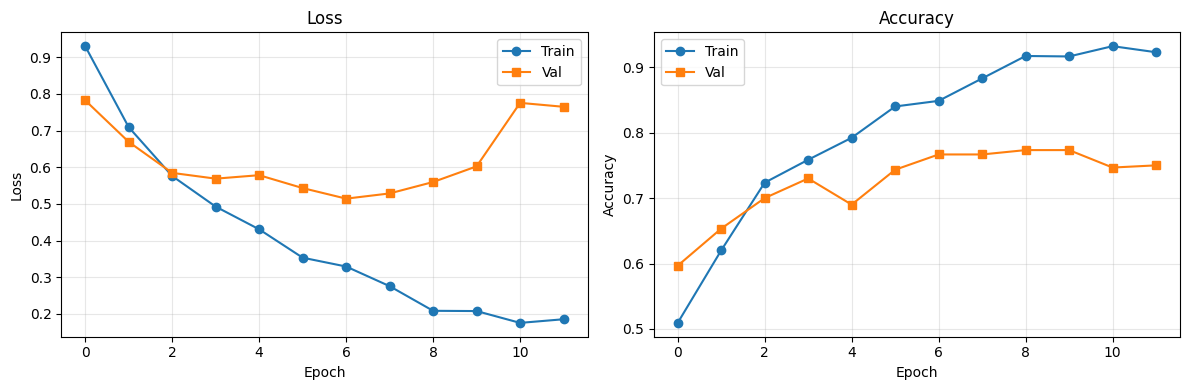

Training history plot saved → data/training_history.png

Training Summary
Final Epoch:
  Train Loss: 0.1852 | Train Acc: 0.9229
  Val Loss:   0.7649 | Val Acc:   0.7500

Best Epoch: 7
  Best Val Loss: 0.5143
  Best Val Acc:  0.7733

✓ Training complete → models/best_resume_classifier.h5


In [19]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from pathlib import Path


# ============================================================================
# Label Encoding Functions
# ============================================================================

def encode_labels(y, num_classes):
    """Encode labels to categorical format"""
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)
    
    return label_encoder, y_encoded, y_categorical


# ============================================================================
# Data Splitting Functions
# ============================================================================

def split_train_val_test(X, y_categorical, y_encoded, test_size=0.3, val_size=0.5, random_state=42):
    """Split data into train/validation/test sets with stratification
    
    Args:
        test_size: Proportion for temp (val+test) split
        val_size: Proportion of temp to use for validation (relative to temp)
        
    Example: test_size=0.3, val_size=0.5 gives 70/15/15 split
    """
    # First split: train vs (val + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_categorical, 
        test_size=test_size,
        random_state=random_state,
        stratify=y_encoded
    )
    
    # Second split: val vs test
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=val_size,
        random_state=random_state,
        stratify=y_temp.argmax(axis=1)
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def print_split_info(X_train, X_val, X_test):
    """Print information about data splits"""
    print(f"Split: Train={X_train.shape[0]} | Val={X_val.shape[0]} | Test={X_test.shape[0]}")
    total = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]
    print(f"Proportions: Train={X_train.shape[0]/total:.1%} | "
          f"Val={X_val.shape[0]/total:.1%} | Test={X_test.shape[0]/total:.1%}")


# ============================================================================
# Input Preparation Functions
# ============================================================================

def prepare_all_inputs(model_classifier, X_train, X_val, X_test):
    """Prepare inputs for all data splits"""
    train_inputs = model_classifier.prepare_inputs(X_train)
    val_inputs = model_classifier.prepare_inputs(X_val)
    test_inputs = model_classifier.prepare_inputs(X_test)
    
    return train_inputs, val_inputs, test_inputs


# ============================================================================
# Class Weight Functions
# ============================================================================

def compute_class_weights(y_train_categorical):
    """Compute balanced class weights"""
    y_train_labels = y_train_categorical.argmax(axis=1)
    
    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train_labels),
        y=y_train_labels
    )
    
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights_array)}
    
    print(f"\nClass weights: {class_weight_dict}")
    return class_weight_dict


# ============================================================================
# Callback Functions
# ============================================================================

def create_training_callbacks(model_dir='models', patience=5):
    """Create training callbacks for early stopping and checkpointing"""
    os.makedirs(model_dir, exist_ok=True)
    
    callbacks = [
        EarlyStopping(
            monitor='val_loss', 
            patience=patience, 
            restore_best_weights=True, 
            verbose=1
        ),
        ModelCheckpoint(
            filepath=f'{model_dir}/best_resume_classifier.h5', 
            monitor='val_loss', 
            save_best_only=True, 
            verbose=1
        )
    ]
    
    return callbacks


# ============================================================================
# Training Functions
# ============================================================================

def train_model(model, train_inputs, y_train, val_inputs, y_val, 
                class_weight_dict, callbacks, batch_size=32, epochs=50):
    """Train the model with specified parameters"""
    print(f"\nTraining: {epochs} epochs, batch_size={batch_size}")
    
    history = model.fit(
        train_inputs,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(val_inputs, y_val),
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=1
    )
    
    return history


# ============================================================================
# Save Functions
# ============================================================================

def save_training_history(history, filepath='data/training_history.json'):
    """Save training history to JSON file"""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    history_dict = {
        key: [float(v) for v in values] 
        for key, values in history.history.items()
    }
    
    with open(filepath, 'w') as f:
        json.dump(history_dict, f, indent=2)
    
    print(f"Training history saved → {filepath}")


def save_complete_model(model, filepath='models/resume_classifier_complete.h5'):
    """Save complete Keras model"""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    model.save(filepath)
    print(f"Complete model saved → {filepath}")


def save_model_config(model_classifier, filepath='artifacts/model_config.json'):
    """Save model configuration for production"""
    Path(os.path.dirname(filepath)).mkdir(exist_ok=True)
    
    model_config = {
        "use_text_branch": model_classifier.use_text_branch,
        "skill_vocab_size": model_classifier.skill_vocab_size,
        "numeric_dim": model_classifier.numeric_dim,
        "text_dim": model_classifier.text_dim,
        "num_classes": model_classifier.num_classes
    }
    
    with open(filepath, 'w') as f:
        json.dump(model_config, f, indent=2)
    
    print(f"Model config saved → {filepath}")


def save_label_encoder(label_encoder, filepath='artifacts/label_encoder.pkl'):
    """Save label encoder for production use"""
    import pickle
    
    Path(os.path.dirname(filepath)).mkdir(exist_ok=True)
    
    with open(filepath, 'wb') as f:
        pickle.dump(label_encoder, f)
    
    print(f"Label encoder saved → {filepath}")


# ============================================================================
# Visualization Functions
# ============================================================================

def plot_training_history(history, save_path='data/training_history.png'):
    """Plot training and validation loss/accuracy"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot loss
    axes[0].plot(history.history['loss'], label='Train', marker='o')
    axes[0].plot(history.history['val_loss'], label='Val', marker='s')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Train', marker='o')
    axes[1].plot(history.history['val_accuracy'], label='Val', marker='s')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"Training history plot saved → {save_path}")


def print_training_summary(history):
    """Print summary of training results"""
    print("\n" + "="*70)
    print("Training Summary")
    print("="*70)
    
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    best_val_loss = min(history.history['val_loss'])
    best_val_acc = max(history.history['val_accuracy'])
    best_epoch = history.history['val_loss'].index(best_val_loss) + 1
    
    print(f"Final Epoch:")
    print(f"  Train Loss: {final_train_loss:.4f} | Train Acc: {final_train_acc:.4f}")
    print(f"  Val Loss:   {final_val_loss:.4f} | Val Acc:   {final_val_acc:.4f}")
    print(f"\nBest Epoch: {best_epoch}")
    print(f"  Best Val Loss: {best_val_loss:.4f}")
    print(f"  Best Val Acc:  {best_val_acc:.4f}")
    print("="*70)


# ============================================================================
# Main Training Pipeline
# ============================================================================

def main(model_classifier, X, y, label_mapping, batch_size=32, epochs=50, patience=5):
    """Main function to execute training procedure"""
    print("\n=== Step 6: Training Procedure ===")
    
    # Encode labels
    label_encoder, y_encoded, y_categorical = encode_labels(y, len(label_mapping['unique_labels']))
    
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(
        X, y_categorical, y_encoded
    )
    print_split_info(X_train, X_val, X_test)
    
    # Prepare inputs
    train_inputs, val_inputs, test_inputs = prepare_all_inputs(
        model_classifier, X_train, X_val, X_test
    )
    
    # Compute class weights
    class_weight_dict = compute_class_weights(y_train)
    
    # Create callbacks
    callbacks = create_training_callbacks(patience=patience)
    
    # Train model
    history = train_model(
        model_classifier.model,
        train_inputs,
        y_train,
        val_inputs,
        y_val,
        class_weight_dict,
        callbacks,
        batch_size=batch_size,
        epochs=epochs
    )
    
    # Save everything
    save_training_history(history)
    save_complete_model(model_classifier.model)
    save_model_config(model_classifier)
    save_label_encoder(label_encoder)
    
    # Visualize and summarize
    plot_training_history(history)
    print_training_summary(history)
    
    print("\n✓ Training complete → models/best_resume_classifier.h5")
    
    return history, label_encoder, (X_train, X_val, X_test, y_train, y_val, y_test), \
           (train_inputs, val_inputs, test_inputs)


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    # This would be called after model architecture setup
    history, label_encoder, splits, inputs = main(
        model_classifier, X, y, label_mapping, 
        batch_size=32, epochs=50, patience=5
    )
    


=== Step 7: Model Evaluation ===
Test Loss: 0.6286 | Test Accuracy: 0.7067

              precision    recall  f1-score   support

         Fit       0.78      0.90      0.83       101
     Not Fit       0.58      0.53      0.55        70
 Partial Fit       0.71      0.65      0.68       129

    accuracy                           0.71       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.71      0.70       300



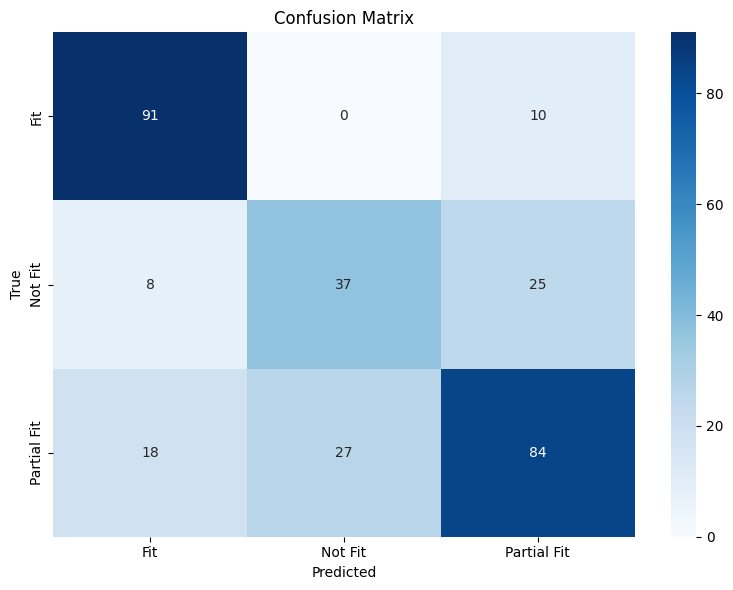

Confusion matrix saved → data/confusion_matrix.png


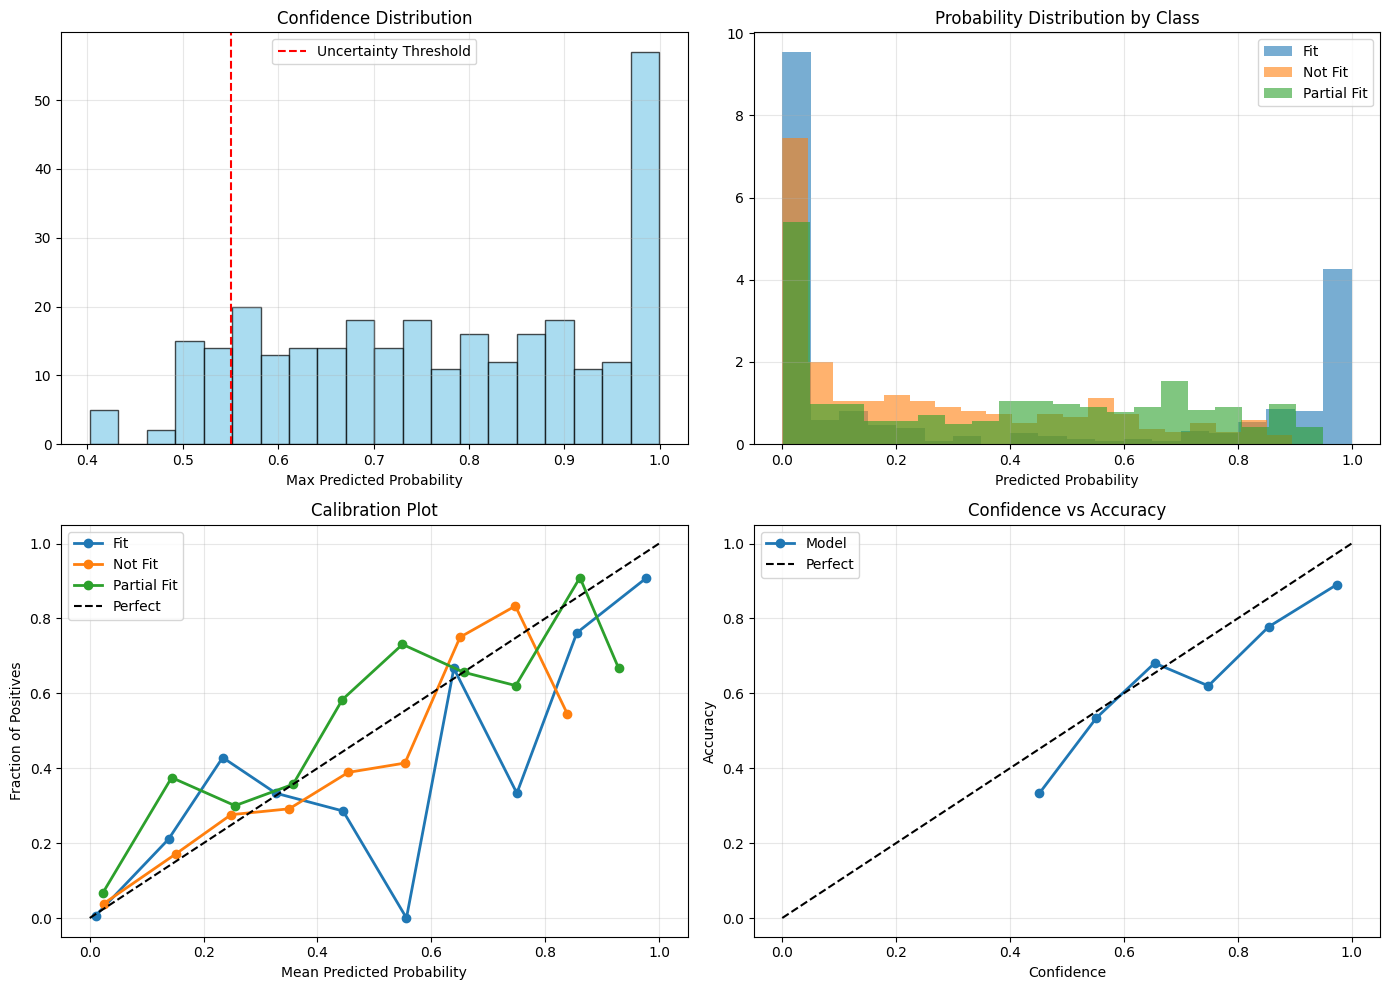

Calibration analysis saved → data/calibration_analysis.png

Uncertainty Analysis (threshold=0.55):
  Uncertain: 36 (12.0%)
  Confident: 264 (88.0%)
Model saved → models/resume_classifier_model.h5
Label encoder saved → models/label_encoder.pkl
Evaluation metrics saved → data/evaluation_metrics.json

✓ Evaluation complete → models/resume_classifier_model.h5, evaluation_metrics.json


In [22]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_recall_fscore_support, 
    classification_report, 
    confusion_matrix, 
    f1_score
)
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')


# ============================================================================
# Prediction Functions
# ============================================================================

def get_predictions(model, test_inputs, y_test):
    """Get predictions and probabilities from model"""
    y_pred_probs = model.predict(test_inputs, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    return y_pred_probs, y_pred, y_true


def evaluate_model(model, test_inputs, y_test):
    """Evaluate model on test set"""
    test_loss, test_accuracy = model.evaluate(test_inputs, y_test, verbose=0)
    return test_loss, test_accuracy


# ============================================================================
# Metrics Calculation Functions
# ============================================================================

def calculate_classification_metrics(y_true, y_pred, target_names):
    """Calculate comprehensive classification metrics"""
    # Classification report
    report = classification_report(y_true, y_pred, target_names=target_names)
    report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # F1 scores
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    return report, report_dict, cm, f1_macro, f1_weighted


def print_evaluation_results(test_loss, test_accuracy, report):
    """Print evaluation results"""
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")
    print(f"\n{report}")


# ============================================================================
# Confusion Matrix Visualization
# ============================================================================

def plot_confusion_matrix(cm, target_names, save_path='data/confusion_matrix.png'):
    """Plot confusion matrix heatmap"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Confusion matrix saved → {save_path}")


# ============================================================================
# Calibration Analysis Functions
# ============================================================================

def plot_confidence_distribution(ax, y_pred_probs, uncertainty_threshold=0.55):
    """Plot confidence distribution histogram"""
    max_probs = y_pred_probs.max(axis=1)
    ax.hist(max_probs, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.axvline(x=uncertainty_threshold, color='red', linestyle='--', 
               label='Uncertainty Threshold')
    ax.set_xlabel('Max Predicted Probability')
    ax.set_title('Confidence Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)


def plot_class_probability_distribution(ax, y_pred_probs, target_names):
    """Plot probability distribution for each class"""
    for i, class_name in enumerate(target_names):
        ax.hist(y_pred_probs[:, i], bins=20, alpha=0.6, label=class_name, density=True)
    ax.set_xlabel('Predicted Probability')
    ax.set_title('Probability Distribution by Class')
    ax.legend()
    ax.grid(True, alpha=0.3)


def plot_calibration_curves(ax, y_true, y_pred_probs, target_names):
    """Plot calibration curves for each class"""
    for i, class_name in enumerate(target_names):
        y_binary = (y_true == i).astype(int)
        fraction_of_positives, mean_predicted_value = calibration_curve(
            y_binary, y_pred_probs[:, i], n_bins=10, strategy='uniform'
        )
        ax.plot(mean_predicted_value, fraction_of_positives, 'o-', 
                label=class_name, linewidth=2)
    
    ax.plot([0, 1], [0, 1], 'k--', label='Perfect')
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.set_title('Calibration Plot')
    ax.legend()
    ax.grid(True, alpha=0.3)


def calculate_confidence_accuracy(y_pred_probs, y_pred, y_true, n_bins=10):
    """Calculate accuracy at different confidence levels"""
    max_probs = y_pred_probs.max(axis=1)
    correct = (y_pred == y_true).astype(int)
    confidence_bins = np.linspace(0, 1, n_bins + 1)
    
    bin_accuracies, bin_confidences = [], []
    
    for i in range(len(confidence_bins) - 1):
        bin_mask = (max_probs >= confidence_bins[i]) & (max_probs < confidence_bins[i+1])
        if bin_mask.sum() > 0:
            bin_accuracies.append(correct[bin_mask].mean())
            bin_confidences.append(max_probs[bin_mask].mean())
    
    return bin_confidences, bin_accuracies


def plot_confidence_vs_accuracy(ax, y_pred_probs, y_pred, y_true):
    """Plot confidence vs accuracy"""
    bin_confidences, bin_accuracies = calculate_confidence_accuracy(
        y_pred_probs, y_pred, y_true
    )
    
    ax.plot(bin_confidences, bin_accuracies, 'o-', linewidth=2, label='Model')
    ax.plot([0, 1], [0, 1], 'k--', label='Perfect')
    ax.set_xlabel('Confidence')
    ax.set_ylabel('Accuracy')
    ax.set_title('Confidence vs Accuracy')
    ax.legend()
    ax.grid(True, alpha=0.3)


def create_calibration_analysis(y_true, y_pred, y_pred_probs, target_names, 
                                save_path='data/calibration_analysis.png'):
    """Create comprehensive calibration analysis visualization"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot all components
    plot_confidence_distribution(axes[0, 0], y_pred_probs)
    plot_class_probability_distribution(axes[0, 1], y_pred_probs, target_names)
    plot_calibration_curves(axes[1, 0], y_true, y_pred_probs, target_names)
    plot_confidence_vs_accuracy(axes[1, 1], y_pred_probs, y_pred, y_true)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Calibration analysis saved → {save_path}")


# ============================================================================
# Uncertainty Analysis
# ============================================================================

def analyze_uncertainty(y_pred_probs, uncertainty_threshold=0.55):
    """Analyze predictions based on uncertainty threshold"""
    max_probs = y_pred_probs.max(axis=1)
    uncertain_mask = max_probs < uncertainty_threshold
    uncertain_count = uncertain_mask.sum()
    total_count = len(y_pred_probs)
    
    print(f"\nUncertainty Analysis (threshold={uncertainty_threshold}):")
    print(f"  Uncertain: {uncertain_count} ({uncertain_count/total_count*100:.1f}%)")
    print(f"  Confident: {total_count - uncertain_count} "
          f"({(1-uncertain_count/total_count)*100:.1f}%)")
    
    return uncertain_mask, uncertain_count


# ============================================================================
# Save Functions
# ============================================================================

def save_model_artifacts(model, label_encoder, 
                        model_path='models/resume_classifier_model.h5',
                        encoder_path='models/label_encoder.pkl'):
    """Save model and label encoder"""
    import os
    
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    model.save(model_path)
    print(f"Model saved → {model_path}")
    
    with open(encoder_path, 'wb') as f:
        pickle.dump(label_encoder, f)
    print(f"Label encoder saved → {encoder_path}")


def save_evaluation_metrics(test_loss, test_accuracy, f1_macro, f1_weighted, 
                           cm, report_dict, filepath='data/evaluation_metrics.json'):
    """Save evaluation metrics to JSON file"""
    import os
    
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    evaluation_metrics = {
        'test_loss': float(test_loss),
        'test_accuracy': float(test_accuracy),
        'f1_macro': float(f1_macro),
        'f1_weighted': float(f1_weighted),
        'confusion_matrix': cm.tolist(),
        'classification_report': report_dict
    }
    
    with open(filepath, 'w') as f:
        json.dump(evaluation_metrics, f, indent=2)
    
    print(f"Evaluation metrics saved → {filepath}")


# ============================================================================
# Main Evaluation Pipeline
# ============================================================================

def main(model, test_inputs, y_test, label_encoder, uncertainty_threshold=0.55):
    """Main function to execute model evaluation pipeline"""
    print("\n=== Step 7: Model Evaluation ===")
    
    # Get predictions
    y_pred_probs, y_pred, y_true = get_predictions(model, test_inputs, y_test)
    
    # Evaluate model
    test_loss, test_accuracy = evaluate_model(model, test_inputs, y_test)
    
    # Calculate metrics
    target_names = label_encoder.classes_
    report, report_dict, cm, f1_macro, f1_weighted = calculate_classification_metrics(
        y_true, y_pred, target_names
    )
    
    # Print results
    print_evaluation_results(test_loss, test_accuracy, report)
    
    # Visualizations
    plot_confusion_matrix(cm, target_names)
    create_calibration_analysis(y_true, y_pred, y_pred_probs, target_names)
    
    # Uncertainty analysis
    uncertain_mask, uncertain_count = analyze_uncertainty(y_pred_probs, uncertainty_threshold)
    
    # Save artifacts
    save_model_artifacts(model, label_encoder)
    save_evaluation_metrics(test_loss, test_accuracy, f1_macro, f1_weighted, 
                          cm, report_dict)
    
    print("\n✓ Evaluation complete → models/resume_classifier_model.h5, evaluation_metrics.json")
    
    return {
        'y_pred_probs': y_pred_probs,
        'y_pred': y_pred,
        'y_true': y_true,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'confusion_matrix': cm,
        'report_dict': report_dict,
        'uncertain_mask': uncertain_mask
    }


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    # This would be called after training
    results = main(model, test_inputs, y_test, label_encoder, uncertainty_threshold=0.55)
    

In [30]:
import json
import joblib
import numpy as np
from datetime import datetime
from pathlib import Path
import keras


# ============================================================================
# Pipeline Class
# ============================================================================

class ResumeClassificationPipeline:
    """Complete pipeline for resume classification with JSON output"""
    
    def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
                 domain_requirements, scaler, use_text_branch=False):
        self.model = model
        self.feature_builder = feature_builder
        self.label_encoder = label_encoder
        self.skill_vocab = skill_vocab
        self.domain_requirements = domain_requirements
        self.scaler = scaler
        self.use_text_branch = use_text_branch
    
    def prepare_inputs(self, X):
        """Prepare inputs for model prediction"""
        skill_dim = len(self.skill_vocab) + 1
        numeric_dim = X.shape[1] - skill_dim
        
        if self.use_text_branch:
            numeric_dim -= self.model.input[-1].shape[1]
        
        skill_features = X[:, :skill_dim]
        numeric_features = X[:, skill_dim:skill_dim + numeric_dim]
        inputs = [skill_features, numeric_features]
        
        if self.use_text_branch:
            text_features = X[:, skill_dim + numeric_dim:]
            inputs.append(text_features)
        
        return inputs
    
    def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
        """Classify a single resume and return structured JSON output"""
        try:
            # Import extract_all_features (should be from feature engineering module)
            # from feature_engineering import extract_all_features
            
            # Extract features
            resume_features = extract_all_features(
                resume_json, self.skill_vocab, self.domain_requirements
            )
            
            # Scale numeric features
            scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
            resume_features['scaled_numeric_features'] = scaled_numeric[0]
            
            # Build feature vector
            final_vector = self.feature_builder.build_final_vector(resume_features)
            
            # Prepare model inputs and predict
            model_inputs = self.prepare_inputs(final_vector.reshape(1, -1))
            class_probs = self.model.predict(model_inputs, verbose=0)[0]
            
            # Get prediction
            pred_idx = np.argmax(class_probs)
            label = self.label_encoder.classes_[pred_idx]
            confidence = round(float(class_probs[pred_idx]), precision)
            
            # Build result
            result = self._build_classification_result(
                label, confidence, resume_features, include_raw_scores, precision
            )
            
            return result
        
        except Exception as e:
            return self._build_error_result(resume_json, str(e))
    
    def _build_classification_result(self, label, confidence, resume_features, 
                                    include_raw_scores, precision):
        """Build structured classification result"""
        # Feature summary
        feature_summary = self._build_feature_summary(
            resume_features, include_raw_scores, precision
        )
        
        # Alternative domains (only for partial/not fit)
        alternative_domains = None
        if label in ["Partial Fit", "Not Fit"]:
            alternative_domains = self._format_alternative_domains(
                resume_features.get('alternative_domains', []), precision
            )
        
        # Generate explanation
        explanation = self._generate_explanation(
            resume_features['test_score'],
            resume_features['skill_match_ratio'],
            resume_features['matched_skills'],
            resume_features['missing_skills'],
            resume_features['project_count'],
            resume_features['years_experience'],
            label,
            confidence,
            alternative_domains
        )
        
        # Build result
        result = {
            "label": label,
            "confidence": confidence,
            "matched_skills": resume_features['matched_skills'],
            "missing_skills": resume_features['missing_skills'],
            "feature_summary": feature_summary,
            "explanation": explanation,
            "metadata": self._build_metadata(resume_features)
        }
        
        if alternative_domains:
            result["alternative_domain_suggestions"] = alternative_domains
        
        return result
    
    def _build_feature_summary(self, resume_features, include_raw_scores, precision):
        """Build feature summary dictionary"""
        feature_summary = {
            "skill_match_ratio": round(resume_features['skill_match_ratio'], precision),
            "years_experience": int(resume_features['years_experience']),
            "test_score_norm": round(resume_features['test_score_norm'], precision),
            "project_count": int(resume_features['project_count'])
        }
        
        if include_raw_scores:
            feature_summary["test_score_raw"] = int(resume_features['test_score'])
        
        return feature_summary
    
    def _build_metadata(self, resume_features):
        """Build metadata dictionary"""
        return {
            "domain": resume_features['domain'],
            "candidate_id": resume_features['id'],
            "classification_timestamp": datetime.now().isoformat(),
            "model_version": "1.0"
        }
    
    def _build_error_result(self, resume_json, error_message):
        """Build error result dictionary"""
        return {
            "error": f"Classification failed: {error_message}",
            "candidate_id": resume_json.get('id', 'unknown'),
            "timestamp": datetime.now().isoformat()
        }
    
    def _format_alternative_domains(self, suggestions, precision=3):
        """Format alternative domain suggestions"""
        if not suggestions:
            return None
        
        formatted = []
        for i, suggestion in enumerate(suggestions, 1):
            formatted.append({
                "rank": i,
                "domain": suggestion['domain'],
                "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
                "matched_skills_count": suggestion['matched_count'],
                "required_skills_count": suggestion['required_count'],
                "matched_skills": suggestion['matched_skills'][:5],
                "key_missing_skills": suggestion['missing_skills'][:3]
            })
        
        return formatted
    
    def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
                             missing_skills, project_count, years_experience, 
                             predicted_label, confidence, alternative_domains=None):
        """Generate human-readable explanation"""
        # Score description
        score_desc = self._get_score_description(test_score)
        
        # Skills description
        total_required = len(matched_skills) + len(missing_skills)
        skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        skills_desc = self._get_skills_description(skill_match_ratio, skills_fraction)
        
        # Missing skills description
        missing_desc = f", but lacks {', '.join(missing_skills[:3])}" if missing_skills else ""
        
        # Experience description
        exp_desc = self._get_experience_description(years_experience)
        
        # Project description
        proj_desc = self._get_project_description(project_count)
        
        # Recommendation
        recommendation = self._get_recommendation(predicted_label, missing_skills)
        
        # Domain suggestion
        domain_suggestion = self._get_domain_suggestion(
            predicted_label, alternative_domains
        )
        
        return (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
                f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
                f"Model confidence: {confidence:.2f} → {predicted_label}."
                f"{recommendation}{domain_suggestion}")
    
    def _get_score_description(self, test_score):
        """Get test score description"""
        if test_score >= 85:
            return "Excellent"
        elif test_score >= 75:
            return "High"
        elif test_score >= 60:
            return "Good"
        elif test_score >= 50:
            return "Fair"
        else:
            return "Low"
    
    def _get_skills_description(self, skill_match_ratio, skills_fraction):
        """Get skills match description"""
        if skill_match_ratio >= 0.8:
            return f"covers most required skills {skills_fraction}"
        elif skill_match_ratio >= 0.6:
            return f"covers many required skills {skills_fraction}"
        elif skill_match_ratio >= 0.4:
            return f"covers some required skills {skills_fraction}"
        else:
            return f"covers few required skills {skills_fraction}"
    
    def _get_experience_description(self, years_experience):
        """Get experience description"""
        if years_experience >= 3:
            return f"{int(years_experience)} years of solid experience"
        elif years_experience >= 1:
            year_text = "year" if years_experience == 1 else "years"
            return f"{int(years_experience)} {year_text} of experience"
        else:
            return "limited professional experience"
    
    def _get_project_description(self, project_count):
        """Get project description"""
        if project_count >= 3:
            return f"strong portfolio ({project_count} projects)"
        elif project_count >= 1:
            project_text = "project" if project_count == 1 else "projects"
            return f"{project_count} {project_text}"
        else:
            return "no projects listed"
    
    def _get_recommendation(self, predicted_label, missing_skills):
        """Get recommendation text"""
        if predicted_label == "Partial Fit" and missing_skills:
            key_missing = missing_skills[:2]
            if key_missing:
                return f" Recommend gaining experience in {', '.join(key_missing)}."
        return ""
    
    def _get_domain_suggestion(self, predicted_label, alternative_domains):
        """Get domain suggestion text"""
        if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
            top_domain = alternative_domains[0]
            match_pct = int(top_domain['skill_match_ratio'] * 100)
            return (f" Consider applying for {top_domain['domain']} roles "
                   f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
                   f"/{top_domain['required_skills_count']} required skills).")
        return ""
    
    def batch_classify(self, resume_list, output_file=None):
        """Classify multiple resumes"""
        results = [self.classify_resume(resume) for resume in resume_list]
        
        if output_file:
            self._save_results(results, output_file)
        
        return results
    
    def _save_results(self, results, output_file):
        """Save classification results to file"""
        Path(output_file).parent.mkdir(exist_ok=True, parents=True)
        with open(output_file, 'w') as f:
            json.dump(results, f, indent=2)
        print(f"Saved {len(results)} results → {output_file}")


# ============================================================================
# Pipeline Loading Functions
# ============================================================================

def get_required_artifact_files():
    """Get list of required artifact files"""
    return [
        'models/resume_classifier_complete.h5',
        'artifacts/feature_scaler.pkl',
        'artifacts/label_encoder.pkl',
        'artifacts/feature_vector_builder.pkl',
        'artifacts/skill_vocabulary.json',
        'artifacts/domain_requirements.json',
        'artifacts/model_config.json'
    ]


def check_required_files(required_files):
    """Check if all required files exist"""
    missing = [f for f in required_files if not Path(f).exists()]
    
    if missing:
        raise FileNotFoundError(
            f"Missing artifacts, run training first: {missing}"
        )
    
    return True


def load_model_artifacts():
    """Load model and related artifacts"""
    model = keras.models.load_model('models/resume_classifier_complete.h5')
    scaler = joblib.load('artifacts/feature_scaler.pkl')
    label_encoder = joblib.load('artifacts/label_encoder.pkl')
    feature_builder = joblib.load('artifacts/feature_vector_builder.pkl')
    
    return model, scaler, label_encoder, feature_builder


def load_json_artifacts():
    """Load JSON configuration files"""
    with open('artifacts/skill_vocabulary.json', 'r') as f:
        skill_vocab = json.load(f)
    
    with open('artifacts/domain_requirements.json', 'r') as f:
        domain_requirements = json.load(f)
    
    with open('artifacts/model_config.json', 'r') as f:
        model_config = json.load(f)
    
    return skill_vocab, domain_requirements, model_config


def load_classification_pipeline():
    """Load complete classification pipeline from saved artifacts"""
    # Load model artifacts
    model, scaler, label_encoder, feature_builder = load_model_artifacts()
    
    # Load JSON artifacts
    skill_vocab, domain_requirements, model_config = load_json_artifacts()
    
    # Create pipeline
    pipeline = ResumeClassificationPipeline(
        model=model,
        feature_builder=feature_builder,
        label_encoder=label_encoder,
        skill_vocab=skill_vocab,
        domain_requirements=domain_requirements,
        scaler=scaler,
        use_text_branch=model_config.get("use_text_branch", False)
    )
    
    return pipeline


# ============================================================================
# Sample Resume Functions
# ============================================================================

def get_sample_resumes():
    """Get sample resumes for testing"""
    return [
        {
            "skills": ["HTML", "CSS", "scikit_learn"],
            "projects": ["Personal Blog Website"],
            "work_experience": [{"title": "Frontend Designer", "years": 1}],
            "test_score": 45,
            "preferred_domain": "Data Science",
            "id": "candidate_1248"
        },
        {
            "skills": ["CI/CD", "PyTorch", "Deep Learning", "Docker", "R", 
                      "Node.js", "Pandas", "Scikit-learn"],
            "projects": ["Customer Churn Prediction"],
            "work_experience": [{"title": "Data Scientist", "years": 8}],
            "test_score": 97,
            "preferred_domain": "Data Science",
            "id": "candidate_1246"
        },
        {
            "skills": ["Python", "Machine Learning", "SQL", "Tableau"],
            "projects": ["Sales Forecasting"],
            "work_experience": [{"title": "Data Analyst", "years": 3}],
            "test_score": 72,
            "preferred_domain": "Data Science",
            "id": "candidate_1247"
        }
    ]


# ============================================================================
# Main Pipeline Function
# ============================================================================

def main():
    """Main function to execute JSON output generation pipeline"""
    print("\n=== Step 10: Final JSON Output Generation ===")
    
    # Check required files
    required_files = get_required_artifact_files()
    check_required_files(required_files)
    
    # Load pipeline
    classification_pipeline = load_classification_pipeline()
    print("✓ Pipeline loaded from saved artifacts")
    
    # Get sample resumes
    sample_resumes = get_sample_resumes()
    
    # Classify resumes
    print(f"\nGenerating JSON outputs for {len(sample_resumes)} resumes...")
    results = classification_pipeline.batch_classify(
        sample_resumes, 
        output_file='data/sample_json_outputs.json'
    )
    
    # Display example output
    print(f"\nExample output:\n{json.dumps(results[0], indent=2)}")
    print("\n✓ Step 10 Complete - Pipeline ready for production use")
    
    return classification_pipeline, results


# ============================================================================
# Usage Example
# ============================================================================

if __name__ == "__main__":
    classification_pipeline, results = main()


=== Step 10: Final JSON Output Generation ===
✓ Pipeline loaded from saved artifacts

Generating JSON outputs for 3 resumes...


Saved 3 results → data/sample_json_outputs.json

Example output:
{
  "label": "Not Fit",
  "confidence": 0.807,
  "matched_skills": [],
  "missing_skills": [
    "docker",
    "python",
    "pytorch",
    "numpy",
    "deep learning",
    "pandas",
    "scikit-learn"
  ],
  "feature_summary": {
    "skill_match_ratio": 0.0,
    "years_experience": 1,
    "test_score_norm": 0.45,
    "project_count": 1,
    "test_score_raw": 45
  },
  "explanation": "Low test score (45/100) and covers few required skills (0/7 matched), but lacks docker, python, pytorch. Has 1 project and 1 year of experience. Model confidence: 0.81 \u2192 Not Fit. Consider applying for Web Development roles (28% skill match with 2/7 required skills).",
  "metadata": {
    "domain": "Data Science",
    "candidate_id": "candidate_1248",
    "classification_timestamp": "2025-10-02T09:21:16.502082",
    "model_version": "1.0"
  },
  "alternative_domain_suggestions": [
    {
      "rank": 1,
      "domain": "Web Development"

In [10]:
# Step 8 - Save Model & Artifacts
print(f"\n=== Step 8: Save Model & Artifacts ===")

# Create models directory if it doesn't exist
Path('models').mkdir(exist_ok=True)
Path('artifacts').mkdir(exist_ok=True)

# Save model weights and architecture
print("Saving model architecture and weights...")
model.save('models/resume_classifier_complete.h5')
print("✓ Saved: models/resume_classifier_complete.h5")

# Save TensorFlow SavedModel format (for production deployment)
# For TensorFlow SavedModel format in Keras 3
model.export('models/resume_classifier_savedmodel')
print("✓ Saved: models/resume_classifier_savedmodel/ (TensorFlow SavedModel)")

# Save all preprocessing artifacts
print("Saving preprocessing artifacts...")

# Save scalers
joblib.dump(scaler, 'artifacts/feature_scaler.pkl')
print("✓ Saved: artifacts/feature_scaler.pkl")

# Save skill vocabulary
with open('artifacts/skill_vocabulary.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)
print("✓ Saved: artifacts/skill_vocabulary.json")

# Save label encoder
joblib.dump(label_encoder, 'artifacts/label_encoder.pkl')
print("✓ Saved: artifacts/label_encoder.pkl")

# Save feature vector builder
joblib.dump(vector_builder, 'artifacts/feature_vector_builder.pkl')
print("✓ Saved: artifacts/feature_vector_builder.pkl")

# Save domain requirements
with open('artifacts/domain_requirements.json', 'w') as f:
    json.dump(domain_requirements, f, indent=2)
print("✓ Saved: artifacts/domain_requirements.json")

# Save complete classification pipeline
joblib.dump(classification_pipeline, 'artifacts/classification_pipeline.pkl')
print("✓ Saved: artifacts/classification_pipeline.pkl")

# Save explanation templates and configuration
explanation_config = {
    "score_thresholds": {
        "excellent": 85,
        "high": 75, 
        "good": 60,
        "fair": 50
    },
    "skill_ratio_thresholds": {
        "most": 0.8,
        "many": 0.6,
        "some": 0.4
    },
    "experience_thresholds": {
        "solid": 3,
        "some": 1
    },
    "confidence_precision": 3,
    "explanation_template": "template_based_explanation"
}

with open('artifacts/explanation_config.json', 'w') as f:
    json.dump(explanation_config, f, indent=2)
print("✓ Saved: artifacts/explanation_config.json")

# Create model manifest/metadata
model_manifest = {
    "model_name": "resume_classifier",
    "version": "1.0",
    "created_date": datetime.now().isoformat(),
    "model_architecture": "hybrid_neural_network",
    "input_features": {
        "skill_vocabulary_size": len(skill_vocab),
        "numeric_features": 4,
        "text_features": 128 if use_text_features else 0,
        "total_features": dimensions['final_vector_dim']
    },
    "output_classes": label_encoder.classes_.tolist(),
    "training_samples": len(X_train),
    "validation_samples": len(X_val),
    "test_samples": len(X_test),
    "test_accuracy": float(test_accuracy),
    "artifacts": {
        "model_weights": "models/resume_classifier_complete.h5",
        "savedmodel": "models/resume_classifier_savedmodel/",
        "feature_scaler": "artifacts/feature_scaler.pkl",
        "skill_vocabulary": "artifacts/skill_vocabulary.json",
        "label_encoder": "artifacts/label_encoder.pkl",
        "feature_builder": "artifacts/feature_vector_builder.pkl",
        "domain_requirements": "artifacts/domain_requirements.json",
        "pipeline": "artifacts/classification_pipeline.pkl",
        "explanation_config": "artifacts/explanation_config.json"
    }
}

with open('artifacts/model_manifest.json', 'w') as f:
    json.dump(model_manifest, f, indent=2)
print("✓ Saved: artifacts/model_manifest.json")

# Test loading pipeline from artifacts
print(f"\n=== Testing Artifact Loading ===")
try:
    # Test loading the complete pipeline
    loaded_pipeline = joblib.load('artifacts/classification_pipeline.pkl')
    
    # Test classification with loaded pipeline
    test_resume = sample_resumes[0]
    loaded_result = loaded_pipeline.classify_resume(test_resume)
    
    if 'error' not in loaded_result:
        print("✓ Successfully loaded and tested complete pipeline")
        print(f"  Test prediction: {loaded_result['label']} ({loaded_result['confidence']})")
    else:
        print(f"✗ Pipeline test failed: {loaded_result['error']}")
        
except Exception as e:
    print(f"✗ Failed to load pipeline: {e}")


=== Step 8: Save Model & Artifacts ===
Saving model architecture and weights...
✓ Saved: models/resume_classifier_complete.h5
INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


Saved artifact at 'models/resume_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 78), dtype=tf.float32, name='skill_input'), TensorSpec(shape=(None, 4), dtype=tf.float32, name='numeric_input'), TensorSpec(shape=(None, 128), dtype=tf.float32, name='text_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2174057742416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057742992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057744528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057743376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057743760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057743952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057744144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057744912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2174057745296: Ten